#Project 4 - Problem 1 (R)
###Intro to Data Science
######*Chris Nolan*

1. Use the following dataset about adults: https://github.com/bforoura/IDS/blob/main/HW4/adult_training.csvLinks to an external site.

In [ ]:
# Let's read in the data file

library(readr)
training_data <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv", show_col_types = FALSE)

summary(training_data)

head(training_data,10)

      age         workclass           education     marital-status    
 Min.   :17.00   Length:14797       Min.   : 1.00   Length:14797      
 1st Qu.:28.00   Class :character   1st Qu.: 9.00   Class :character  
 Median :37.00   Mode  :character   Median :10.00   Mode  :character  
 Mean   :38.69                      Mean   :10.07                     
 3rd Qu.:48.00                      3rd Qu.:12.00                     
 Max.   :90.00                      Max.   :16.00                     
  occupation            sex             capital-gain    capital-loss    
 Length:14797       Length:14797       Min.   :    0   Min.   :   0.00  
 Class :character   Class :character   1st Qu.:    0   1st Qu.:   0.00  
 Mode  :character   Mode  :character   Median :    0   Median :   0.00  
                                       Mean   : 1067   Mean   :  88.58  
                                       3rd Qu.:    0   3rd Qu.:   0.00  
                                       Max.   :99999   Max.   :43

age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
40,Private,11,Married-civ-spouse,Craft-repair,Male,0,0,>50K
38,Private,7,Married-civ-spouse,Sales,Male,0,0,<=50K
43,Private,7,Married-civ-spouse,Transport-moving,Male,0,2042,<=50K
54,?,10,Married-civ-spouse,?,Male,0,0,>50K


First lets search for any missing data that needs to be imputed

In [ ]:
cat("There are", sum(is.na(training_data)), "missing values.\n\n")

There are 0 missing values.



Since there are no missing values there is no need to impute anything

2. Create a contingency table of workclass and sex, and plot it.

In [ ]:
firstTable <- table(training_data$workclass, training_data$sex)

ftable(firstTable)

                  Female Male
                             
?                    377  452
Federal-gov          149  305
Local-gov            377  592
Never-worked           1    4
Private             3574 6707
Self-emp-inc          54  444
Self-emp-not-inc     178  992
State-gov            201  385
Without-pay            1    4

3. Create a contingency table of sex and marital status, and plot it.

In [ ]:
secondTable <- table(training_data$`marital-status`, training_data$sex)

ftable(secondTable)

margin.table(secondTable, 1)

margin.table(secondTable,2)

                       Female Male
                                  
Divorced                 1219  795
Married-AF-spouse           7    4
Married-civ-spouse        761 6010
Married-spouse-absent      95  104
Never-married            2160 2717
Separated                 290  182
Widowed                   380   73


             Divorced     Married-AF-spouse    Married-civ-spouse 
                 2014                    11                  6771 
Married-spouse-absent         Never-married             Separated 
                  199                  4877                   472 
              Widowed 
                  453 


Female   Male 
  4912   9885 

4.Create a new data frame, adultOver40, for those whose age > 40.

In [ ]:
over40 <- data.frame(AdultOver40 = (training_data$age > 40))

over40

5.Recreate the contingency table of sex and marital status for adultOver40.

In [ ]:
firstCombo <- table(training_data$sex[which(over40$AdultOver40)],training_data$`marital-status`[which(over40$AdultOver40)])

ftable(firstCombo)

        Divorced Married-civ-spouse Married-spouse-absent Never-married Separated Widowed
                                                                                         
Female       720                305                    38           256       133     354
Male         448               3383                    47           315        74      71

6.Determine whether any outliers exist for the education field.

In [ ]:
# Determine the three sigma rule first for the age attribute
three_sigma_rule <- (training_data$education < (sd(training_data$education) - sd(training_data$education)*3) |
                     training_data$education > (sd(training_data$education) + sd(training_data$education)*3 ))


# how many outliers are there?
cat ("There are", sum(three_sigma_rule), "outliers \n\n")

# The which() command returns the row indices of all such records.
cat("The scaled age values that are outliers: \n\n")
training_data$education[which(three_sigma_rule)]


cat("\n\nThe scaled age values that are NOT outliers: \n\n")
training_data$education[which(!three_sigma_rule)]

There are 4742 outliers 

The scaled age values that are outliers: 



[1] 13 14 11 13 14 13 11 13 13 12 13 16 14 13 14 11 13 13 13 12 12 13 14 11
  [25] 11 13 14 11 13 13 13 14 13 13 13 13 11 15 13 14 13 12 13 14 13 13 13 13
  [49] 14 13 14 14 11 13 14 12 13 11 12 13 13 13 13 14 13 13 12 13 11 13 13 13
  [73] 13 11 14 16 14 13 12 13 13 14 11 13 13 13 13 13 14 15 14 16 13 13 13 14
  [97] 13 13 11 13 13 16 14 13 13 14 14 14 13 13 13 16 13 11 13 13 13 11 11 14
 [121] 13 13 16 11 13 11 11 14 13 12 14 13 11 14 11 13 13 14 11 16 13 14 13 13
 [145] 13 11 13 13 15 12 14 14 14 15 13 13 13 14 11 13 11 14 13 13 13 11 11 12
 [169] 13 13 13 13 14 12 12 13 13 11 13 12 13 16 13 13 13 13 14 13 13 13 13 13
 [193] 14 11 12 13 15 11 11 13 14 13 12 14 13 13 13 16 15 14 13 13 14 13 13 13
 [217] 12 13 12 15 13 11 13 13 15 14 13 13 13 11 14 13 13 13 14 13 12 11 14 14
 [241] 15 13 14 11 13 14 14 11 13 13 13 14 12 16 13 13 13 13 13 13 15 12 13 13
 [265] 15 13 15 12 13 13 11 13 13 11 13 13 12 13 14 14 12 13 11 13 11 14 13 13
 [289] 12 13 14 13 14 14 13 13 13 13 14 14 13 13 14 13 13 12 13 13 13 14 12 16
 [313] 13 11 12 13 13 13 13 11 13 13 13 14 12 13 16 14 11 13 14 13 14 13 13 13
 [337] 11 12 12 14 13 13 13 13 12 13 13 13 12 13 13 11 13 15 12 14 16 13 13 11
 [361] 11 15 13 14 11 13 13 13 14 14 13 13 13 12 11 14 13 16 13 13 11 13 15 15
 [385] 13 13 14 13 12 11 14 13 11 13 13 13 12 13 14 11 13 13 14 11 14 13 13 13
 [409] 14 13 13 11 14 13 14 11 13 13 13 11 13 15 13 13 14 13 13 13 11 15 13 13
 [433] 14 13 13 16 14 12 13 14 13 14 15 13 15 13 11 15 14 13 13 14 12 13 14 15
 [457] 13 14 12 11 15 13 13 13 13 14 13 11 13 13 14 13 14 13 16 13 16 15 14 14
 [481] 15 11 13 13 12 13 13 13 15 13 16 13 16 12 13 14 13 12 14 13 13 16 13 15
 [505] 15 13 13 13 13 13 13 13 13 13 13 13 13 13 11 12 12 13 14 13 13 12 13 13
 [529] 13 11 16 16 11 13 14 13 13 14 13 11 13 13 13 13 13 13 13 13 14 13 11 14
 [553] 13 15 13 13 13 12 13 13 13 15 13 11 13 16 11 13 12 11 13 13 13 13 14 13
 [577] 14 11 14 13 14 13 13 15 11 13 13 15 13 13 13 13 14 13 15 11 13 13 11 11
 [601] 12 13 13 13 11 13 13 13 14 14 14 12 13 13 13 12 13 11 15 12 13 13 14 14
 [625] 13 13 13 15 13 13 12 13 13 11 11 13 13 12 14 13 11 13 13 16 12 13 13 13
 [649] 13 13 13 13 15 14 15 11 13 11 15 13 14 14 12 12 11 14 13 13 13 13 12 16
 [673] 15 15 13 13 15 13 13 11 13 13 13 13 13 12 13 13 13 13 13 13 14 13 14 14
 [697] 13 12 12 11 11 16 14 13 11 13 13 12 12 13 13 13 13 14 13 11 13 13 13 13
 [721] 15 14 13 13 11 13 12 13 12 13 13 13 13 13 13 12 13 13 12 15 13 11 11 13
 [745] 11 15 13 15 14 14 13 12 11 13 14 13 16 16 13 12 15 12 12 13 14 14 11 13
 [769] 14 14 16 13 16 13 12 14 15 13 13 13 13 13 12 13 14 14 13 14 16 12 13 13
 [793] 13 12 12 13 13 13 14 11 11 13 13 13 13 14 11 11 13 11 14 13 13 11 14 13
 [817] 13 13 12 13 12 13 13 13 14 14 12 12 13 13 12 13 11 11 15 13 13 14 13 13
 [841] 13 13 11 16 14 12 14 13 13 13 13 13 14 14 13 11 15 13 15 16 13 13 12 14
 [865] 15 13 14 16 12 12 12 11 13 13 11 11 11 14 14 13 12 13 14 13 13 11 13 13
 [889] 13 13 13 13 16 13 13 12 11 13 11 12 12 13 13 11 12 12 13 11 12 13 13 11
 [913] 14 14 12 13 13 16 15 15 13 13 11 14 13 13 13 14 13 13 13 14 13 15 14 14
 [937] 14 13 11 14 12 13 11 14 11 16 13 13 14 14 13 13 13 13 14 14 14 13 14 14
 [961] 13 13 14 12 13 14 13 13 13 16 11 13 13 11 11 14 14 14 14 14 14 12 13 13
 [985] 11 16 13 11 13 14 13 11 13 11 13 13 14 15 14 12 14 13 13 12 14 13 13 13
[1009] 12 14 14 13 13 11 14 14 12 13 13 11 13 13 13 13 13 14 13 13 14 12 16 15
[1033] 13 12 13 14 16 13 13 12 14 13 15 14 13 11 16 13 13 13 14 13 13 11 13 14
[1057] 13 13 14 14 11 11 12 15 13 13 13 13 13 13 13 13 13 13 13 16 13 13 13 13
[1081] 15 12 13 13 14 12 16 11 13 13 14 12 16 14 11 13 13 13 13 12 14 14 13 14
[1105] 13 12 14 13 11 11 14 13 13 13 16 16 12 13 14 13 12 14 13 13 11 13 13 13
[1129] 13 13 13 13 13 15 13 13 13 14 13 11 13 13 14 13 13 14 13 13 13 13 13 16
[1153] 13 12 13 12 13 13 13 13 13 14 12 13 13 13 13 14 13 11 13 13 15 15 14 13
[1177] 13 11 11 15 13 14 13 14 13 13 16 11 13 12 12 11 15 14 14 14 14 11 15 13
[1201] 13 12 11 13 13 13 13 13 13 12 14 13 13 15 11 1



The scaled age values that are NOT outliers: 



[1]  9  5  9  7  7 10  9 10 10  9 10  5 10  9  9 10 10 10  9 10 10 10  7  9
   [25]  9  9  9  6  7  9  9  9  5 10  9 10 10  9 10  9 10 10  9  9  9 10  2 10
   [49]  7  9 10  9  9  9 10 10 10  9  7  9 10  9  4  9  9  1  9  9  9 10  9 10
   [73]  9 10  9  9  9 10  9  9  9  9 10  9 10  9 10  9  9  9 10 10  9  9 10  9
   [97]  7  9 10  9  9 10  9  9  9  9  7  9 10 10  9 10 10 10 10  9  9  9 10  9
  [121] 10 10  9  2 10  7  9  9 10 10  9  9  9  9 10  9  9 10  9 10  9  9  9  9
  [145] 10  9  9  3 10 10  7  9  9  2  6  9 10  7  9  9  7 10  4  9  7 10  9 10
  [169]  9  9 10 10  9  9  9  6  9  9  9  5  9  9  9  3 10  9  9  9 10  9  9  5
  [193]  4 10 10  5  7  9 10  7  9  4 10 10  9 10 10  9 10  9  9 10  9  7 10 10
  [217] 10 10  9 10  8  6  9  9  9  9  9 10 10 10  3  9  9 10 10 10 10  9  9 10
  [241]  9  7  9  7 10  6  9 10  9  9  9 10  7 10  9  7  9  9  7 10  9  9  9  9
  [265]  9  7  9  7 10 10  6 10  9  5 10  4  9  9 10  6  9 10 10  9  9  2  9 10
  [289]  7  9  9  9 10 10 10 10  6  9  9 10  9  9 10  9  9  9  9 10  9 10 10  9
  [313]  9 10  4  9  9  9 10  9  9  9  9  7  9 10 10 10 10  9  9 10  9  9  9 10
  [337] 10  6  9  9  9 10  9 10 10  9  9 10  9  2 10  9  9  9  9  9  7 10  9  9
  [361]  9 10  9  9 10 10  9 10  9 10  9  9 10  9  9 10  9  9  9 10  9  9 10  9
  [385]  9 10  9  9  9 10  9  9  9  7 10 10  9  7 10  3  6  9  9  9  9 10  9  4
  [409]  6  9  9  7  9  9 10  6 10  9  7  9  9 10 10  6  9  9  9 10 10  6  9  9
  [433]  6  9 10  9 10  9  9  9  9  9 10  9  9  9 10  9 10 10  5  5 10 10  9  9
  [457]  6  6 10  9  6 10  9 10  8  4 10 10  7 10  6  9 10  9  9 10 10  9  9 10
  [481]  9  7  7  9  6  9  9  9  9  9  9 10  6  9  9  9  4  9  9 10  9 10 10  9
  [505]  9  9  9  9  9  9  9 10 10  9 10  9  9  4  9 10  8 10  9 10  9 10  9  9
  [529]  9  9  7  9  9 10  9  6  9 10  6  7  3  5 10  9  9  9  9  9  9  9  9  4
  [553] 10  9  9 10  9 10  4  9 10  9  5  9 10  9 10  5  9 10 10  9  9 10  9  7
  [577]  9  9  9  6  5  7  9  2 10 10 10  9  9  9  9  7  9  9  6  9  9 10  9 10
  [601]  7  9  7  6  9  9 10  9 10 10 10  9  9  9  9  9 10  7  9 10 10  4  6 10
  [625]  7 10  9  4  9  7 10  9 10 10 10  9  9  9 10 10  8  9 10 10  9  9 10  9
  [649]  7  9  9 10 10  9  9 10  9 10  7 10  6 10  3  9 10  6  9 10 10  7  8  5
  [673]  9  9  9  9  9 10  9  7  9  4  9 10 10 10 10 10  9  9  8  9  9  9 10  9
  [697]  9  7  9 10 10 10  4 10 10  7 10  7  6  9  9  7  9  5  5 10 10 10  9  4
  [721]  9 10 10  4 10  9 10 10  5  9  8  9  9 10 10 10  3  6  9  9 10  9  9  7
  [745] 10  7  9 10  9  9 10 10 10  9  9  9 10  4 10  9 10 10 10  9 10  9  9  9
  [769] 10  9  9 10  7  9  6  2  7  9 10  9  6  6  9  9  3  9  9  6  9  9  7 10
  [793]  9 10  4 10  9 10  9  9  9  3  2  7  9 10 10  9  5 10  9 10  9  7 10  7
  [817]  9  9  9 10  9 10  9  9  9  9  5 10  7 10 10 10  9 10 10  9  9  9  7 10
  [841]  6  9 10  9  3  9 10  9 10 10  7 10  6  5  9 10 10  9  6  2  8 10  4  9
  [865]  9  3  1  9 10  9  6  9 10  9 10  9 10  9  9  9  9  6 10  9  9 10  9  7
  [889]  1  9 10  9 10  6  9 10 10  9 10 10  7  6  9 10  9  9  9  6  9 10  9  9
  [913] 10 10  3 10 10  9  9  6 10 10  9 10  9  9 10 10  9 10  9  9 10  5  9  9
  [937] 10 10 10 10 10  9 10  7 10 10 10  9  9  9 10  9  9  9  9 10  9 10 10  9
  [961]  9  9  9 10  6  4 10  8  9  3  9  5  4  9  4 10  7  9 10 10  2  9 10 10
  [985]  5 10  9  9  6  9  9 10  9  3 10  4  9  9  9  9 10 10  9 10  9  9 10  8
 [1009] 10 10 10 10  9  9  9  9 10  7  9  9 10  7  9  7  7 10  9 10  9  9  6  9
 [1033]  9 10  9  3 10 10 10 10 10 10  9 10  6  9  9  9 10  1 10 10  9  9 10  6
 [1057]  9  4  9  9 10  7 10  9 10  9  9 10  9  9 10  9 10  6  9  6 10  8  7  9
 [1081]  9  9 10  9  9  4  4 10  9 10 10  9  9  7  6 10 10  9  9  4  9  6  5  9
 [1105]  9  9 10  9  9  9  3  9  7  9  9  9 10  9  9  9  5  9 10 10  9 10  9 10
 [1129]  9  9 10  9 10  5  9 10  9 10  9  9 10  4 10  9  9 10 10 10 10  9  9 10
 [1153]  9 10 10  4  9  6  9 10 10 10 10  9  9  7  9 10 10  9 10 10  8  9 10 10
 [1177] 10  6  9  9 10  9  3  9 10  6  9  9 10 10 10 10  9 10  9 10  9 10 10 10
 [12

7.Standardize (zero mean) the age variable, and identify how many outliers there are. What is the most extreme outlier?

In [26]:
training_data$scaled_age <- scale(x = training_data$age)

summary(training_data$scaled_age)

# Determine the three sigma rule first for the scaled_age attribute
three_sigma_rule_two <- (training_data$scaled_age < -3 |
                     training_data$scaled_age > 3 )


# how many outliers are there?
cat ("\nThere are", sum(three_sigma_rule_two), "outliers \n\n")


# The condition given as input to which() states that we want
# all records whose scaled age values are less than −3 or greater than 3.

# The which() command returns the row indices of all such records.

cat("\n\nThe scaled age values that is the biggest outlier: \n\n")
max(training_data$scaled_age[which(three_sigma_rule_two)], na.rm = FALSE)

       V1         
 Min.   :-1.5855  
 1st Qu.:-0.7813  
 Median :-0.1234  
 Mean   : 0.0000  
 3rd Qu.: 0.6808  
 Max.   : 3.7512  


There are 60 outliers 



The scaled age values that is the biggest outlier: 



[1] 3.751227

8.Age anomaly? Select only records with age  at least 80, and construct a histogram of age. Explain what you see.

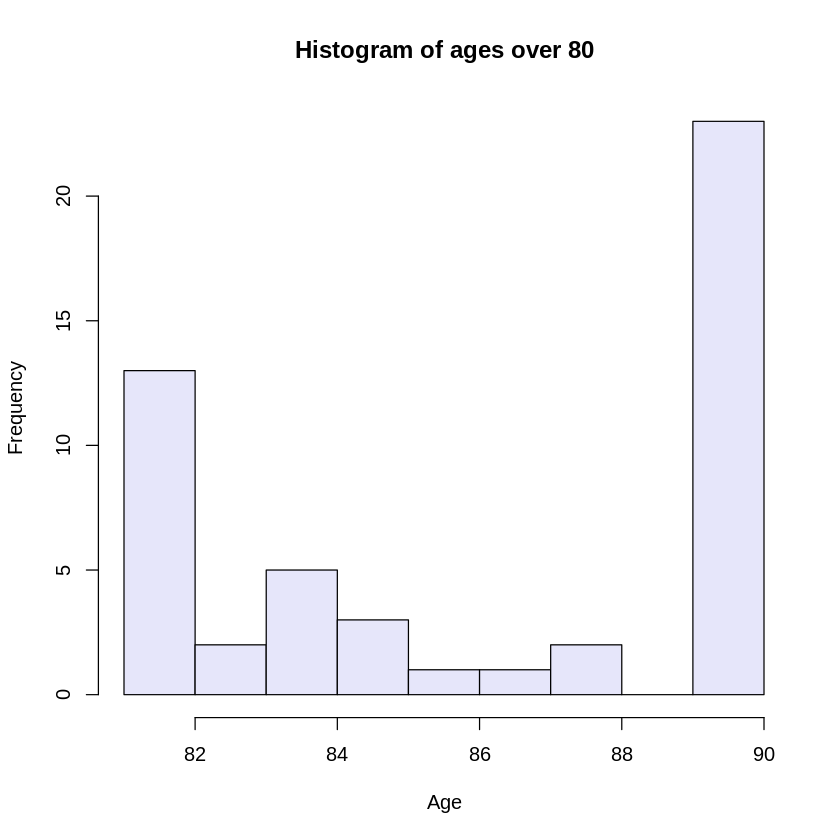

In [ ]:
hist(training_data$age[which(training_data$age > 80)], xlab = "Age",
       main = "Histogram of ages over 80", col="lavender")

After looking at the histogram it seems that there are a big group of people who are between the ages of 80 - 82 and 89 - 90 with very few ages in the middle.

9.Summarize your findings. \
After looking at all the data I was very interested by the comparison between the relationship status and gender. For Married-civ-spouse there was a lot more men in that catagory than women, the opposite of this can be said for widowed where there is almost 3 times more widowed women than men. I wonder what the cause for the huge differences in gender of these two catagories could be.

